In [115]:
import os, cv2, re, random
import numpy as np
import pandas as pd
import json
from pprint import pprint
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [116]:
# from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import img_to_array, load_img
# from keras import layers, models, optimizers
# from keras import backend as K

In [117]:
ann_DIR=r"C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/ann/"
img_DIR=r"C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/img/"

In [118]:
img=[img_DIR+i for i in os.listdir(img_DIR)] 
ann=[ann_DIR+i for i in os.listdir(ann_DIR)] 

In [119]:
img[0]

'C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/img/00000000_E112YB13.png'

In [120]:
ann[0]

'C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/ann/00000000_E112YB13.json'

In [126]:
    with open(ann[0]) as f:
        data = json.load(f)
    print(data)

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[26.0, 43.0], [101.0, 61.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}


In [122]:
def draw_contour(img,file):  
    with open(file) as f:
        data = json.load(f)
    ext=data['objects'][0]['points']['exterior'][0]
    xt=data['objects'][0]['points']['exterior'][0][0]
    yt=data['objects'][0]['points']['exterior'][0][1]
    xl=data['objects'][0]['points']['exterior'][1][0]
    yl=data['objects'][0]['points']['exterior'][1][1]
    im = np.array(Image.open(img), dtype=np.uint8)

    # Create figure and axes

    fig,ax = plt.subplots(1)

    height=abs(yt-yl)
    width=abs(xt-xl)
    
    # Display the image
    ax.imshow(im,cmap='gray')

    # Create a Rectangle patch
    rect = patches.Rectangle(ext,width,height,linewidth=1,edgecolor='r',facecolor='none')
    
    # Add the patch to the Axes
    ax.add_patch(rect)

    return plt.show()

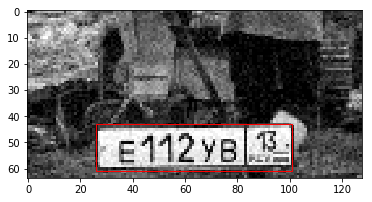

In [124]:
draw_contour(img[0],ann[0])

In [10]:
# def split_dataset(ann):
# for jsonfile in glob.iglob(os.path.join(src_dir, "*.json")):
#     with open(jsonfile) as f:
#         data = json.load(f)
#     if 'train' in  data['tags']:    
#         shutil.copy(jsonfile, train_dst_dir)
#     else:
#         shutil.copy(jsonfile, valid_dst_dir)

In [11]:
with open(ann[0]) as f:
    data = json.load(f)
pprint(data)

{'description': '',
 'objects': [{'bitmap': {'np': [], 'origin': []},
              'classTitle': 'plate_bbox',
              'description': '',
              'points': {'exterior': [[26.0, 43.0], [101.0, 61.0]],
                         'interior': []},
              'tags': [],
              'type': 'rectangle'}],
 'size': {'height': 64, 'width': 128},
 'tags': ['train']}


In [12]:
# import shutil #to copy ann  from one path to another
# import glob
# import os
# src_dir = r"C:\Users\Vision\Downloads\artificial_samples\License plates__artificial\ann"
# train_dst_dir = r"C:\Users\Vision\Downloads\artificial_samples\split\train\ann"
# valid_dst_dir = r"C:\Users\Vision\Downloads\artificial_samples\split\valid\ann"

# for jsonfile in glob.iglob(os.path.join(src_dir, "*.json")):
#     with open(jsonfile) as f:
#         data = json.load(f)
#     if 'train' in  data['tags']:    
#         shutil.copy(jsonfile, train_dst_dir)
#     else:
#         shutil.copy(jsonfile, valid_dst_dir)

In [13]:
# #good old normal split
image_fps_list = list(img)
random.seed(42)
random.shuffle(image_fps_list)
val_size = 1500
image_fps_val = image_fps_list[:val_size]
image_fps_train = image_fps_list[val_size:]

In [14]:
ann_fps_list = list(ann)
random.seed(42)
random.shuffle(ann_fps_list)
val_size = 1500
ann_fps_val = ann_fps_list[:val_size]
ann_fps_train = ann_fps_list[val_size:]


In [15]:
# image_fps_train

In [16]:
# ann_fps_train

In [17]:
ann[0]

'C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/ann/00000000_E112YB13.json'

In [18]:
# !git clone https://www.github.com/matterport/Mask_RCNN.git
# os.chdir('Mask_RCNN')
# #!python setup.py -q install

In [19]:
pwd

'D:\\PYTHON\\Scripts\\License-Plate-Detection'

In [20]:
# sys.path.append(os.path.join(ROOT_DIR, 'Mask_RCNN'))  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

D:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [21]:
# img

In [22]:
# img[0]

In [23]:
from PIL import Image
import numpy as np
# import xrange
im = Image.open(img[0])

pixels = list(im.getdata())
width, height = im.size 
z=np.array(pixels)
print((z.shape))
# pixels = [pixels[i * width:(i + 1) * width] for i in xrange(height)]
# np.savetxt("pixel_data.txt", pixels, delimiter=" ") 

(8192,)


In [24]:
# y=np.reshape(z,(128,64))
# print(Image.load(y))

AttributeError: module 'PIL.Image' has no attribute 'load'

In [25]:
z.shape


(8192,)

In [27]:
# # for i, fp in enumerate(img):
# with open(img[0]) as f:
# #     data = json.load(f)
# #     print(data)
# #             annotations = data
#     print(f.read())
# #     im = Image.open(f, 'r')
# #     print(im.get_data())
# # print(annotations)

In [29]:
img[0]

'C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/img/00000000_E112YB13.png'

In [55]:
# for i, fp in enumerate(img):
from PIL import Image
filename='C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/img/00000000_E112YB13'
# img=Image.open(filename+'.png').convert('LA')
img = cv2.imread(filename+'.png', 0)
data=np.array(img,dtype='uint8')
print(data)
#     with open(img[i]) as f:
#         data = (f)
#     im = Image.open(data, ‘ r’)
#     print(im.get_data())
#     ds = pydicom.read_file(fp)
#     image = ds.pixel_array   
#     print(data.pixel_array)
    

[[ 26   3  73 ...  56  59  50]
 [152 112 106 ...  72  49  60]
 [159 149 182 ...  47  72  70]
 ...
 [ 40  58  57 ...  77  90  87]
 [ 77  49  99 ...  28  35  65]
 [ 90  68  64 ...  37 142 133]]


In [56]:
data.shape

(64, 128)

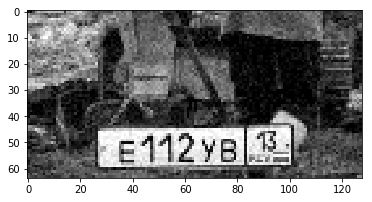

In [57]:
np.save( filename + '.npy', data)
img_array = np.load(filename + '.npy')
plt.imshow(img_array,cmap='gray') 

In [59]:
with open(ann[0]) as f:
    data = json.load(f)
    print(data)
            

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[26.0, 43.0], [101.0, 61.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}


In [175]:

class DetectorDataset(utils.Dataset):
    """Dataset class for training pneumonia detection on the RSNA pneumonia dataset.
    """

    def __init__(self, image_fps, image_annotations, orig_height, orig_width):
        super().__init__(self)
        
        # Add classes
        self.add_class('license plate', 1, 'confidence')
        
        # add images 
        for i, fp in enumerate(img):
            with open(ann[i]) as f:
                data = json.load(f)
            annotations = data
            self.add_image('license plate', image_id=i, path=fp, 
                           annotations=annotations, orig_height=128, orig_width=64)
            
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

    def load_image(self, image_id):
        filename='C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/img/00000000_E112YB13'
        img = cv2.imread(filename+'.png', 0)
        image=np.array(img,dtype='uint8')
#         info = self.image_info[image_id]
#         fp = info['path']
#         ds = pydicom.read_file(fp)
#         image = ds.pixel_array
#         # If grayscale. Convert to RGB for consistency.
#         if len(image.shape) != 3 or image.shape[2] != 3:
#             image = np.stack((image,) * 3, -1)
        return image

    def load_mask(self, image_id):
        info = self.image_info[image_id]
        annotations = info['annotations']
        count = len(annotations)

        mask = np.zeros((64, 128), dtype=np.uint8)
        class_ids = np.zeros((1,), dtype=np.int32)
        for i, a in enumerate(annotations):
#                 if a['Target'] == 1:
#             x = int(a['x'])
#             y = int(a['y'])
#             w = int(a['width'])
#             h = int(a['height'])
#             ext=int(data['objects'][0]['points']['exterior'][0])
            x=int(data['objects'][0]['points']['exterior'][0][0])
            y=int(data['objects'][0]['points']['exterior'][0][1])
            xl=int(data['objects'][0]['points']['exterior'][1][0])
            yl=int(data['objects'][0]['points']['exterior'][1][1])
            h=abs(y-yl)
            w=abs(x-xl)
#             ax.imshow(im,cmap='gray')

            # Create a Rectangle patch
#             rect = patches.Rectangle(ext,width,height,linewidth=1,edgecolor='r',facecolor='none')
                
            mask_instance = mask[:, :].copy()
            cv2.rectangle(mask_instance, (x, y), (x+w, y+h), 255, -1)
            mask[:, :] = mask_instance
#             class_ids[i] = 1
        return mask.astype(np.bool)
    

In [176]:
dataset_train = DetectorDataset(image_fps_train, ann_fps_train, 128, 64)
dataset_train.prepare()

In [177]:
ann[0]

'C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/ann/00000000_E112YB13.json'

In [180]:
np.unique(t.load_mask(0),return_counts=True)

(array([False,  True]), array([6748, 1444], dtype=int64))

In [178]:
t=DetectorDataset(img[0],ann[0],128,64)
print(t.load_mask(0))

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [1]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.layers import Dense,Dropout

D:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
